## 데이터프레임 합치기
- 두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 만든다.

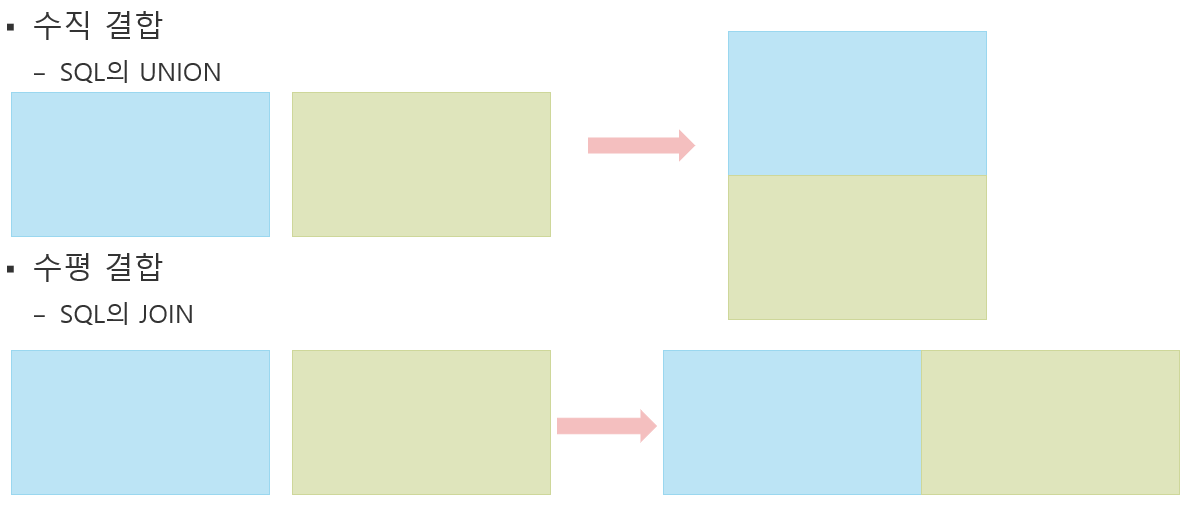

## 데이터셋 읽기
- stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
- stocks_info.csv : 주식 정보

In [1]:
import pandas as pd



In [ ]:
f_txt= ['2016',]

## concat() 이용
- 수직, 조인을 이용한 수평 결합 모두 지원한다.
- 조인(수평결함)의 경우 full outer join과 inner join을 지원한다.
    - full outer join이 기본 방식
    - 조인 기준: index가 같은 행 끼리 합친다. (equi-join)
- pd.concat(objs,  [, key=리스트]), axis=0, join='outer' )
    - 매개변수
        - objs: 합칠 DataFrame들을 리스트로 전달
        - keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        - axis
            - 0 또는 index : 수직결합
            - 1 또는 columns : 수평결합
        - join: 
            - 조인방식
            - 'outer'(기본값) 또는 'inner'

> ### 조인(join)
> - 여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> - 두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> - Inner Join, Left Outer Join, Right Outer Join, Full Outer Join

In [2]:
s_2018

NameError: name 's_2018' is not defined

## 조인을 통한 DataFrame 합치기
- join()
    - 2개 이상의 DataFrame을 조인할 때 사용
- merge()
    - 2개의 DataFrame의 조인만 지원

### join()
- dataframe객체.join(others, how='left', lsuffix='', rsuffix='') 
- `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
- 두개 이상의 DataFrame들을 조인 할 수 있다.
    - **조인 기준**: index가 같은 값인 행끼리 합친다. (equi-join)
    - **조인 기본 방식**: Left Outer Join
- 매개변수
    - lsuffix, rsuffix 저
        - 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 발생.
        - 같은 이름이 있는 경우 붙일 접미어 지정
    - how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본
        

In [3]:
s_info

NameError: name 's_info' is not defined

### merge()
- `df_a.merge(df_b)`
- 두개의 DataFrame 조인만 지원
    - **조인 기준**: 같은 컬럼명을 기준으로 equi-join이 기본. **조인기준을 다양하게 정할 수 있다.**
    - **조인 기본 방식**: inner join
- `dataframe.merge(합칠dataframe, how='inner', on=None, left_on=None, right=None, left_index=False, right_index=False)`  
- 매개변수
    - on : 같은 컬럼명이 여러개일때 join 대상 컬럼을 선택
    - right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명. 
    - left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정 
    - how : 조인 방식.  'left', 'right', 'outer', 'inner'. 기본: inner 
    - suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        - 생략시 x, y를 붙인다.       

- 수직으로 합치는 경우(Union) : concat() 사용
- 두개 **이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
- 두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편하다.

# TODO

In [4]:

# TODO 1 data/customer.csv, data/order.csv, data/qna.csv 를 DataFrame으로 읽으시오.

cust_df = pd.read_csv('data/customer.csv')
order_df = pd.read_csv('data/order.csv')
qna_df = pd.read_csv('data/qna.csv')

In [5]:
file_names = ['data/customer.csv','data/order.csv','data/qna.csv']
cust_df, order_df,qna_df = [pd.read_csv(file) for file in file_names]

In [6]:
# TODO 2 TODO1에서 읽은 세개의 데이터셋의 정보를 확인하세요. 
cust_df.shape,order_df.shape,qna_df.shape

((5, 3), (6, 3), (3, 3))

In [17]:
# TODO 3 customer DataFrame과 order DataFrame을 고객정보는 모두 나오도록 join 하세요.
#join
cust_df.set_index('id').join(order_df.set_index('cust_id'))

,name,age,order_id,total_price
id-1,김영수,33,1.0,100000.0
id-1,김영수,33,2.0,250000.0
id-2,박선영,23,3.0,300000.0
id-2,박선영,23,4.0,15000.0
id-2,박선영,23,5.0,51000.0
id-3,오정현,21,NaN,NaN
id-4,박명수,40,6.0,32000.0
id-5,이철기,17,NaN,NaN


In [16]:
#merge() - 기본join방식 : inner
result = cust_df.merge(order_df, left_on = 'id', right_on = 'cust_id', how = 'left')
result.drop(columns = 'cust_id', inplace = True)
result


,id,name,age,order_id,total_price
0,id-1,김영수,33,1.0,100000.0
1,id-1,김영수,33,2.0,250000.0
2,id-2,박선영,23,3.0,300000.0
3,id-2,박선영,23,4.0,15000.0
4,id-2,박선영,23,5.0,51000.0
5,id-3,오정현,21,NaN,NaN
6,id-4,박명수,40,6.0,32000.0
7,id-5,이철기,17,NaN,NaN


In [19]:
# TODO 4 customer DataFrame의 index를 id컬럼으로 변경.
cust_df.set_index('id',inplace = True)


In [22]:
cust_df

,name,age
id,,
id-1,김영수,33
id-2,박선영,23
id-3,오정현,21
id-4,박명수,40
id-5,이철기,17


In [24]:
# TODO 5 customer DataFrame과 qna DataFrame을 inner join 하세요.
# join() - left join
# cust_df.join(qna_df.set_index('cust_id'), how='inner')
qna_df.set_index('cust_id').join(cust_df, how = 'inner')

,qna_no,txt,name,age
id-4,1,물건있나요?,박명수,40
id-4,2,얼마에요,박명수,40
id-5,3,반품은 어떻게 해요?,이철기,17


In [25]:
# merge()-inner
cust_df.merge(qna_df, left_index = True, right_on='cust_id')

,name,age,qna_no,cust_id,txt
0,박명수,40,1,id-4,물건있나요?
1,박명수,40,2,id-4,얼마에요
2,이철기,17,3,id-5,반품은 어떻게 해요?


In [27]:
# TODO 6. 세개의 DataFrame을 고객정보는 모두 나오도록 join 하세요.
cust_df.join([order_df.set_index('cust_id'), qna_df.set_index('cust_id')], how='left')

,name,age,order_id,total_price,qna_no,txt
id-1,김영수,33,1.0,100000.0,NaN,NaN
id-1,김영수,33,2.0,250000.0,NaN,NaN
id-2,박선영,23,3.0,300000.0,NaN,NaN
id-2,박선영,23,4.0,15000.0,NaN,NaN
id-2,박선영,23,5.0,51000.0,NaN,NaN
id-3,오정현,21,NaN,NaN,NaN,NaN
id-4,박명수,40,6.0,32000.0,1.0,물건있나요?
id-4,박명수,40,6.0,32000.0,2.0,얼마에요
id-5,이철기,17,NaN,NaN,3.0,반품은 어떻게 해요?


In [31]:
#merge
tmp= cust_df.merge(order_df, left_index=True, right_on='cust_id',how='left')
tmp

,name,age,order_id,cust_id,total_price
0.0,김영수,33,1.0,id-1,100000.0
1.0,김영수,33,2.0,id-1,250000.0
2.0,박선영,23,3.0,id-2,300000.0
3.0,박선영,23,4.0,id-2,15000.0
4.0,박선영,23,5.0,id-2,51000.0
NaN,오정현,21,NaN,id-3,NaN
5.0,박명수,40,6.0,id-4,32000.0
NaN,이철기,17,NaN,id-5,NaN


In [35]:
tmp.merge(qna_df, left_on='cust_id',right_on='cust_id', how = 'left')

,name,age,order_id,cust_id,total_price,qna_no,txt
0,김영수,33,1.0,id-1,100000.0,NaN,NaN
1,김영수,33,2.0,id-1,250000.0,NaN,NaN
2,박선영,23,3.0,id-2,300000.0,NaN,NaN
3,박선영,23,4.0,id-2,15000.0,NaN,NaN
4,박선영,23,5.0,id-2,51000.0,NaN,NaN
5,오정현,21,NaN,id-3,NaN,NaN,NaN
6,박명수,40,6.0,id-4,32000.0,1.0,물건있나요?
7,박명수,40,6.0,id-4,32000.0,2.0,얼마에요
8,이철기,17,NaN,id-5,NaN,3.0,반품은 어떻게 해요?


## Database Table 의 데이터를 읽어서 DataFrame 생성

- pd.read_sql('select'문, connection)
    - select문 조회결과를 가지는 Dataframe을 반환

In [50]:
!pip install pymysql

In [51]:
import pymysql
import pandas as pd

In [54]:
connection = pymysql.connect(host='127.0.0.1', port=3306,user='hanec',password ='1866',database='hr_join')

In [55]:
emp = pd.read_sql('select * from emp', connection)

/Users/han-yechan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [56]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [57]:
emp_test = pd.read_sql('select emp_id ID, emp_name 이름, hire_date 입사일 from emp where comm_pct is not null', connection)
emp_test

,ID,이름,입사일
0,145,John,2004-10-01
1,146,Karen,2004-10-01
2,147,Alberto,2005-03-10
3,148,Gerald,2007-10-15
4,149,Eleni,2007-10-15
5,150,Peter,2007-10-15
6,151,David,2005-03-24
7,152,Peter,2005-08-20
8,153,Christopher,2006-03-30
9,154,Nanette,2006-12-09


In [ ]:
dept = pd.read_sql('select * from dept', connection)
job = pd.read_sql('select *')